# Task 5: Personal Loan Acceptance Prediction



**Objective:**
 Predict which customers are likely to accept a personal loan offer.

# Instruction :

● Perform basic data exploration on features such as age, job, and marital status.

● Train a Logistic Regression or Decision Tree classifier.

● Analyze the results to identify which customer groups are more likely to accept the offer.

# Dataset : Bank Marketing dataset

This is the classic marketing bank dataset uploaded originally in the UCI Machine Learning Repository. The dataset gives you information about a marketing campaign of a financial institution in which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading dataset
df=pd.read_csv('/content/sample_data/bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
#getting some information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
#cheking missing value
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


# Perform basic data exploration on features such as age, job, and marital status.

In [ ]:
#Exploring age
df['age'].describe()


,age
count,11162.000000
mean,41.231948
std,11.913369
min,18.000000
25%,32.000000
50%,39.000000
75%,49.000000
max,95.000000


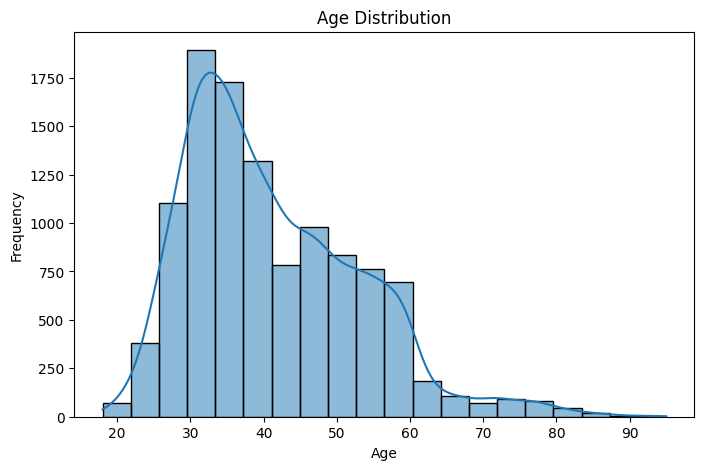

In [ ]:
#distribution plot
plt.figure(figsize=(8,5))
sns.histplot(df['age'],bins=20 , kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64


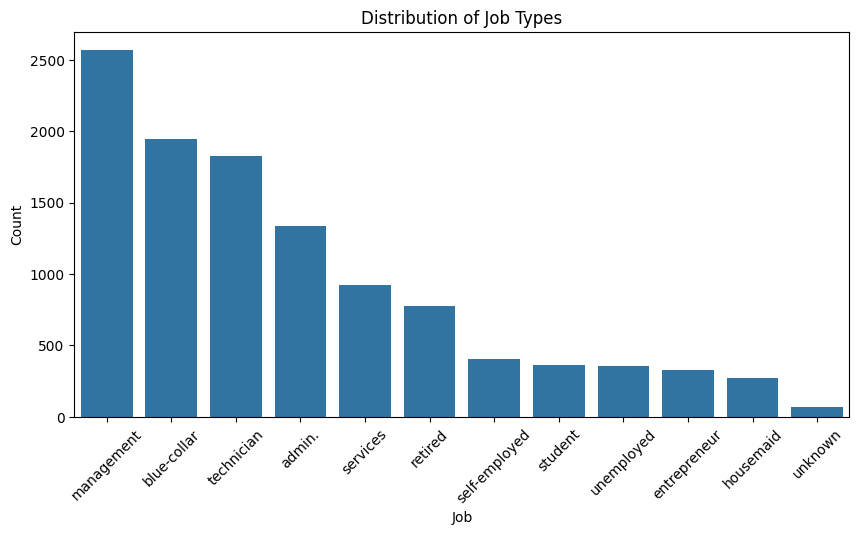

In [ ]:
#Exploring job
# Value counts
print(df['job'].value_counts())

# Bar plot
plt.figure(figsize=(10, 5))
sns.countplot(x='job', data=df, order=df['job'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Job Types')
plt.xlabel('Job')
plt.ylabel('Count')
plt.show()


marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64


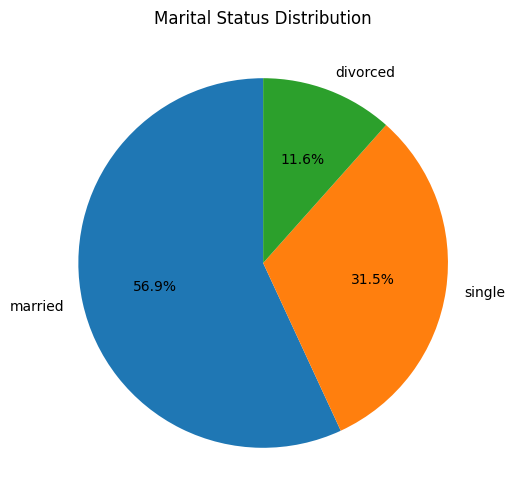

In [ ]:
#explore marital status
# Value counts
print(df['marital'].value_counts())

# Pie chart
plt.figure(figsize=(6, 6))
df['marital'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Marital Status Distribution')
plt.ylabel('')
plt.show()


In [ ]:
#import lilbraries for model training
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [ ]:
#replace 'yes' with 1 and 'no' with 0 in target variable "deposit"
df['deposit']=df['deposit'].replace({'yes': 1, 'no': 0})



/tmp/ipython-input-3575918144.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['deposit']=df['deposit'].replace({'yes': 1, 'no': 0})


In [ ]:
#getting some information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 1.4+ MB


In [ ]:
#Encode categorical features
categorical_cols = df.select_dtypes(include='object').columns.tolist()
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [ ]:
print(df['deposit'].head())

0    1
1    1
2    1
3    1
4    1
Name: deposit, dtype: int64


In [ ]:
#check missing value in target variable
df['deposit'].isnull().sum()

np.int64(0)

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  11162 non-null  int64
 1   balance              11162 non-null  int64
 2   day                  11162 non-null  int64
 3   duration             11162 non-null  int64
 4   campaign             11162 non-null  int64
 5   pdays                11162 non-null  int64
 6   previous             11162 non-null  int64
 7   deposit              11162 non-null  int64
 8   job_blue-collar      11162 non-null  bool 
 9   job_entrepreneur     11162 non-null  bool 
 10  job_housemaid        11162 non-null  bool 
 11  job_management       11162 non-null  bool 
 12  job_retired          11162 non-null  bool 
 13  job_self-employed    11162 non-null  bool 
 14  job_services         11162 non-null  bool 
 15  job_student          11162 non-null  bool 
 16  job_technician       1

In [ ]:
#split dataset
X = df_encoded.drop('deposit', axis=1)
y = df_encoded['deposit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#train model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
# Predict & Evaluate
y_pred_log = log_model.predict(X_test)
print("🔹 Logistic Regression Results 🔹")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

🔹 Logistic Regression Results 🔹
Accuracy: 0.8110165696372593
Confusion Matrix:
 [[975 191]
 [231 836]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82      1166
           1       0.81      0.78      0.80      1067

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233



In [ ]:
#Acceptance Rate by Category
def acceptance_rate_by_feature(feature):
    return df.groupby(feature)['deposit'].mean().sort_values(ascending=False)

# Example: by job
print("Acceptance Rate by Job:")
print(acceptance_rate_by_feature('job'))

# By marital status
print("\nAcceptance Rate by Marital Status:")
print(acceptance_rate_by_feature('marital'))

# By education
print("\nAcceptance Rate by Education:")
print(acceptance_rate_by_feature('education'))


Acceptance Rate by Job:
job
student          0.747222
retired          0.663239
unemployed       0.565826
management       0.507015
unknown          0.485714
admin.           0.473013
self-employed    0.461728
technician       0.460779
services         0.399783
housemaid        0.397810
entrepreneur     0.375000
blue-collar      0.364198
Name: deposit, dtype: float64

Acceptance Rate by Marital Status:
marital
single      0.543491
divorced    0.481052
married     0.433790
Name: deposit, dtype: float64

Acceptance Rate by Education:
education
tertiary     0.541068
unknown      0.507042
secondary    0.447407
primary      0.394000
Name: deposit, dtype: float64


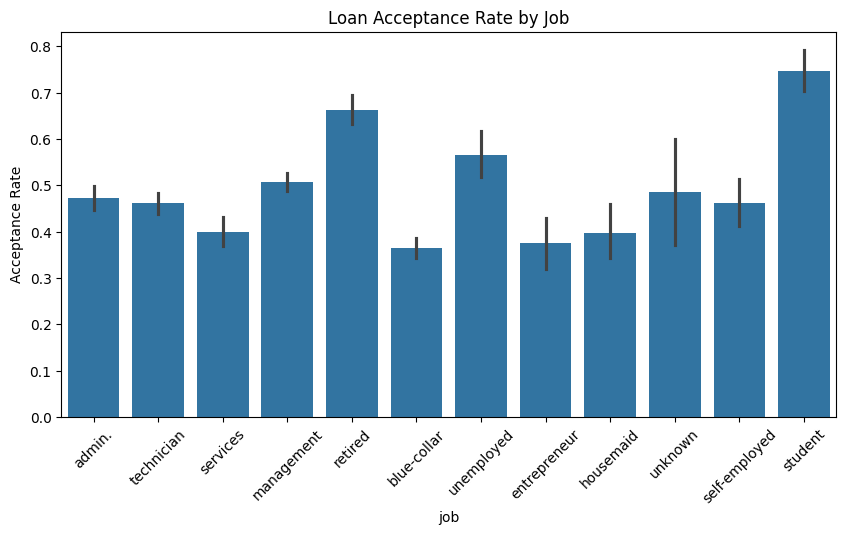

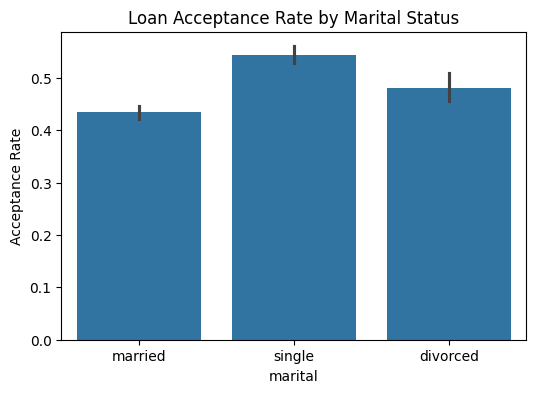

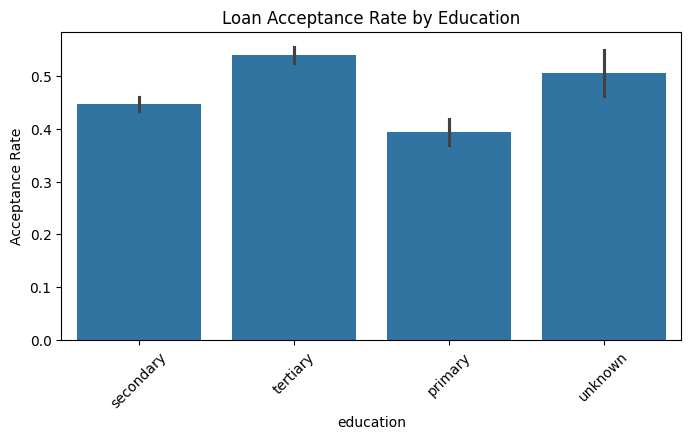

In [ ]:
#Visualize Acceptance by Groups
# Job
plt.figure(figsize=(10, 5))
sns.barplot(x='job', y='deposit', data=df, estimator=lambda x: sum(x) / len(x))
plt.xticks(rotation=45)
plt.title('Loan Acceptance Rate by Job')
plt.ylabel('Acceptance Rate')
plt.show()

# Marital
plt.figure(figsize=(6, 4))
sns.barplot(x='marital', y='deposit', data=df, estimator=lambda x: sum(x) / len(x))
plt.title('Loan Acceptance Rate by Marital Status')
plt.ylabel('Acceptance Rate')
plt.show()

# Education
plt.figure(figsize=(8, 4))
sns.barplot(x='education', y='deposit', data=df, estimator=lambda x: sum(x) / len(x))
plt.xticks(rotation=45)
plt.title('Loan Acceptance Rate by Education')
plt.ylabel('Acceptance Rate')
plt.show()


# **conclusion** :
Job: Students and retirees have the highest acceptance rate.

Marital Status: Single people tend to accept more than married ones.

Existing Loan: Customers without an existing loan are more likely to accept.

In [ ]:
#save the model
import joblib
joblib.dump(log_model, 'loan_acceptance_model.pkl')

['loan_acceptance_model.pkl']